# Analysing Historical Automobile Sales

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,528.0,2001.500000,12.710467,1980.000000,1990.750000,2001.500000,2012.250000,2023.000000
Recession,528.0,0.214015,0.410526,0.000000,0.000000,0.000000,0.000000,1.000000
Consumer_Confidence,528.0,101.140170,10.601154,73.900000,94.035000,100.740000,108.240000,131.670000
Seasonality_Weight,528.0,0.575795,0.454477,0.000000,0.250000,0.500000,0.750000,1.500000
Price,528.0,24964.991956,4888.073433,8793.663000,21453.300500,25038.691500,28131.684750,44263.657000
Advertising_Expenditure,528.0,3067.456439,1139.564637,1009.000000,2083.500000,3072.000000,4067.250000,4983.000000
Competition,528.0,6.064394,1.968350,3.000000,4.000000,6.000000,8.000000,9.000000
GDP,528.0,40.073903,16.249714,12.508000,27.237500,39.214500,53.506500,70.374000
Growth_Rate,528.0,-0.242001,0.861268,-4.227601,-0.574049,-0.013162,0.388932,0.815074
unemployment_rate,528.0,2.453977,1.119019,1.000000,1.600000,2.300000,2.900000,6.000000


In [9]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

### Plot of Automobile sales over the years

In [25]:
mpl.style.available
plt.style.use("seaborn-v0_8-talk")

<Figure size 1000x600 with 0 Axes>

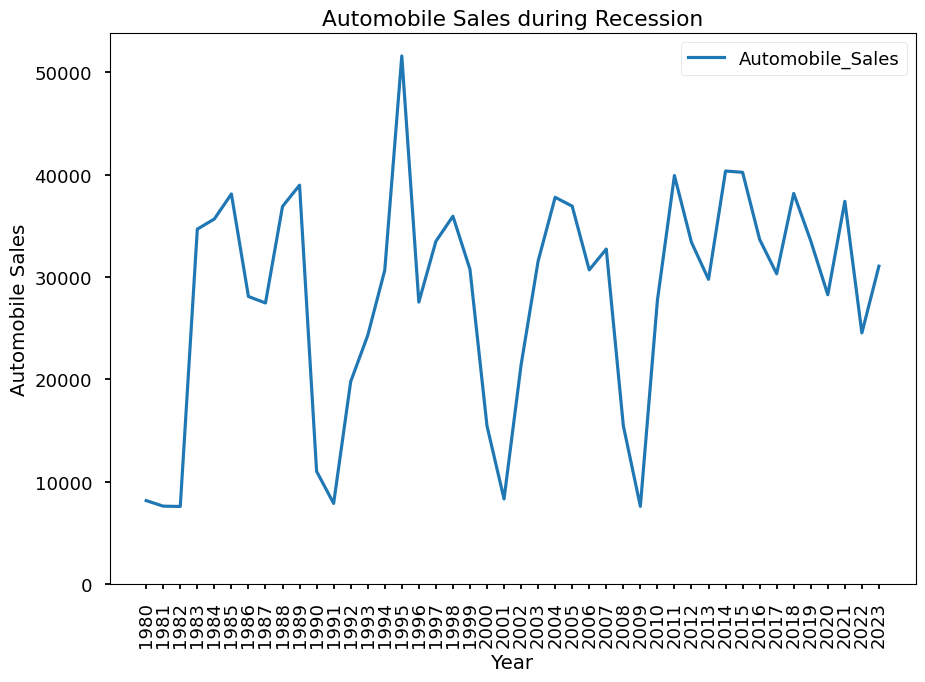

In [79]:
plt.figure(figsize=(10,6))
df[["Year","Automobile_Sales"]].groupby("Year").sum().plot()
plt.title("Automobile Sales during Recession")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
ticks = df.Year.unique()
plt.xticks(ticks=ticks, rotation = 90)
plt.show()


In [83]:
df[df.Recession==1].Year.unique()

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020])

### Inference
- During recession years 1982, 1991, 2001, and  2009, Sales were below 10000 cars per year
- Car sales peaked in 1995. 

## Plot Automobile sales per vehicle type during recesssion

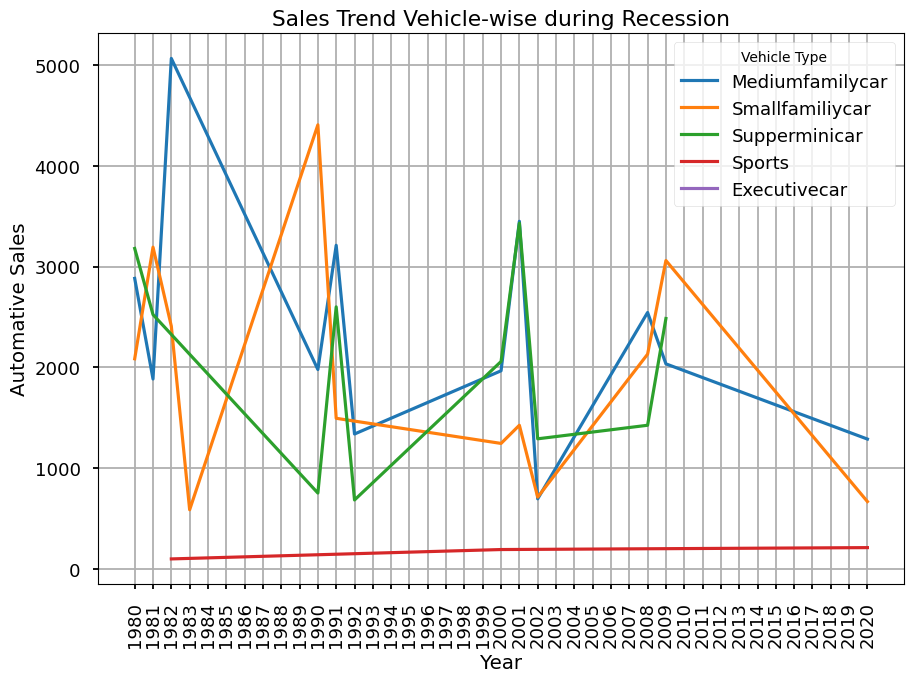

In [95]:
df_recession = df[df.Recession==1]
dfc=df_recession.groupby(["Year","Vehicle_Type"], as_index=False)["Automobile_Sales"].sum()
sns.lineplot(data=dfc, x = "Year", y= "Automobile_Sales", hue="Vehicle_Type")
ticks = np.arange(df_recession.Year.min(),df_recession.Year.max()+1) 
plt.xticks(ticks=ticks, rotation = 90)
plt.xlabel("Year")
plt.ylabel("Automative Sales")
plt.legend(title="Vehicle Type")
plt.title("Sales Trend Vehicle-wise during Recession")
plt.grid()
plt.show()

### Inference
* Sports car sales droped drastically during recession
* Sales were barely above 5000 cars during recession

## Plot Automobile sales per vehicle types during recession and non recession

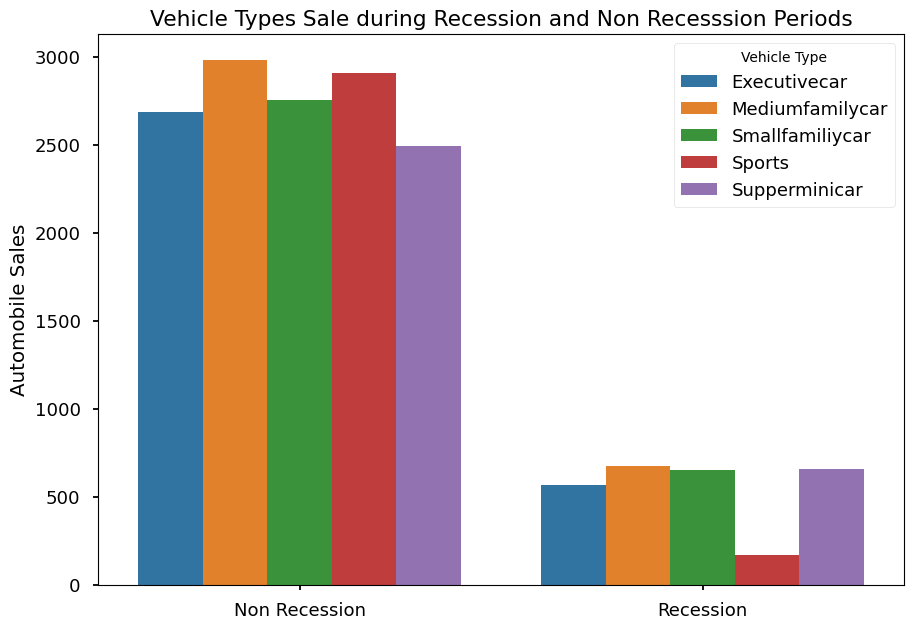

In [96]:
df_vehicle_all_periods = df.groupby(["Recession","Vehicle_Type"],as_index=False)["Automobile_Sales"].mean()
df_vehicle_all_periods
sns.barplot(data=df_vehicle_all_periods,x="Recession", y="Automobile_Sales", hue="Vehicle_Type" )
plt.title("Vehicle Types Sale during Recession and Non Recesssion Periods")
plt.ylabel("Automobile Sales")
plt.xlabel("")
plt.xticks (ticks=[0,1], labels=["Non Recession","Recession"])
plt.legend(title="Vehicle Type")
plt.show()

### Inference
* Sales during recession years are drastically lower than non recession years
* Sports cars are the least sold cars during recession years. 

## Comparing GPD during recession and non recession

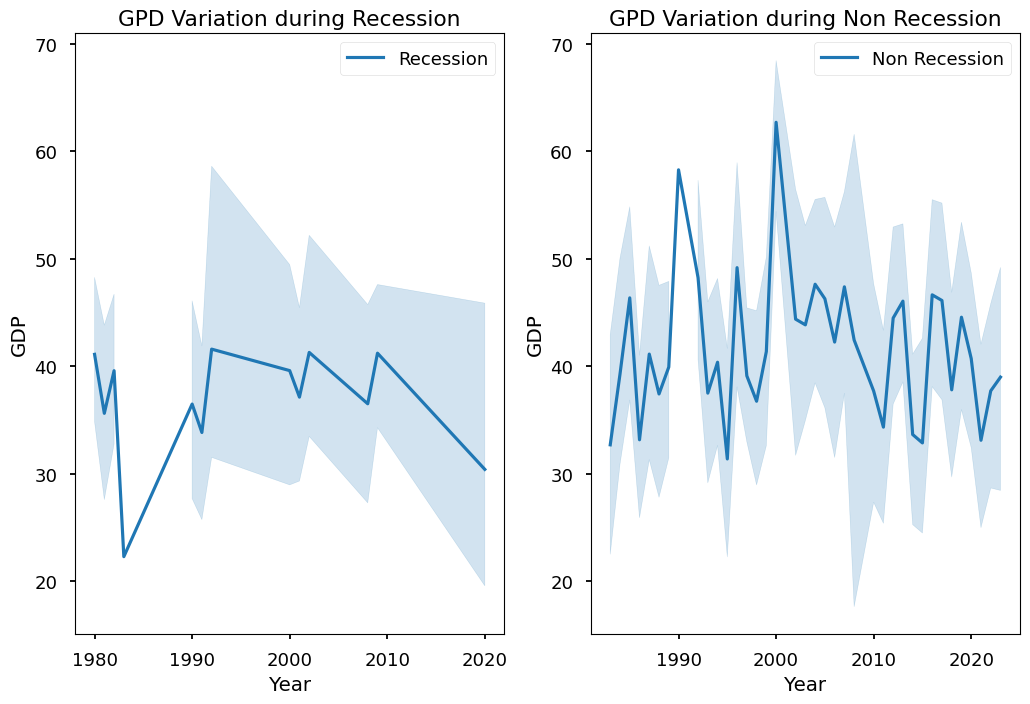

In [109]:
df_non_recession = df[df.Recession==0]
## Recession GDP
ax1=plt.subplot(1,2,1)
sns.lineplot(data=df_recession, x="Year", y="GDP", label="Recession")
plt.title("GPD Variation during Recession")

## NOn Recession GDP
plt.subplot(1,2,2,sharey=ax1)
sns.lineplot(data=df_non_recession, x= "Year", y="GDP", label="Non Recession")
plt.title("GPD Variation during Non Recession")
plt.tight_layout()

### Inference
* GDP during recession years average peaks bearly above 40 USD compared to above 60 USD for non recession years

## How does seasonality weights affect sales ? 

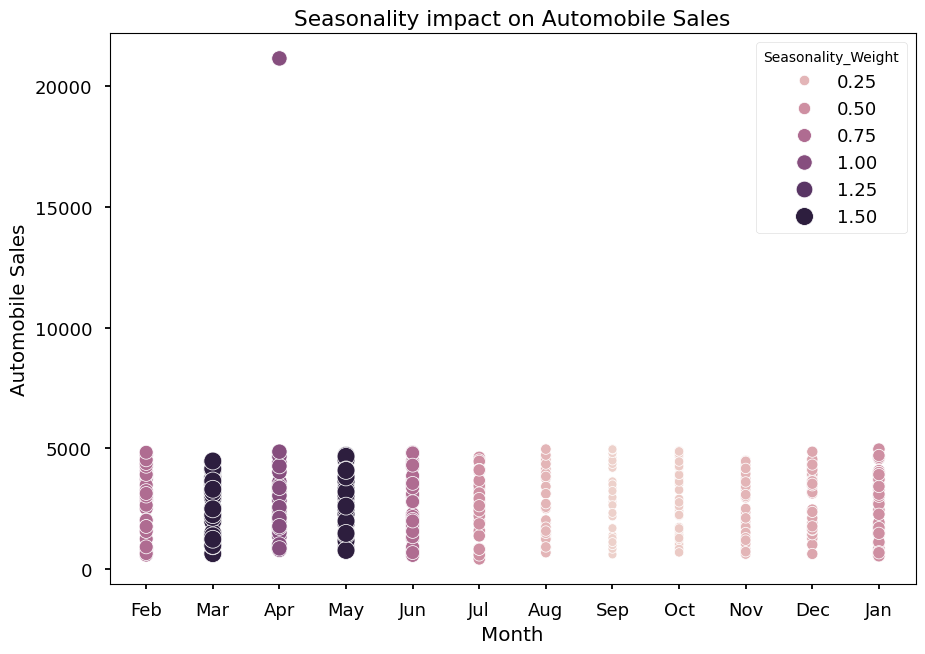

In [117]:

sns.scatterplot(data=df_non_recession, x="Month", y="Automobile_Sales", size="Seasonality_Weight", hue="Seasonality_Weight")
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

### Inference
- Seasonality weights does not noticeably affect sales 
- Sales for all months peak around 5000 cars
- There is a noticeable outlier in the sales on April 

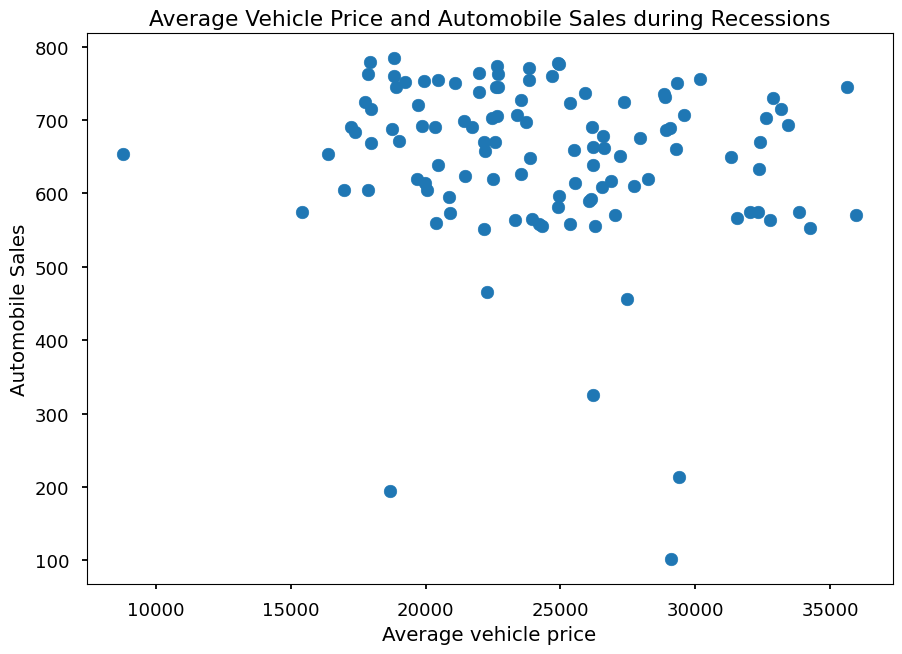

In [140]:

#df_recession.plot(x="Consumer_Confidence", y="Automobile_Sales", kind="scatter")
plt.scatter(x=df_recession.Price, y=df_recession.Automobile_Sales)
plt.title("Average Vehicle Price and Automobile Sales during Recessions")
plt.xlabel("Average vehicle price")
plt.ylabel("Automobile Sales")
plt.show()

In [143]:
df[["Price","Automobile_Sales"]].corr().Price

Price               1.000000
Automobile_Sales    0.012052
Name: Price, dtype: float64

## How much was advertisement expenditure during recession and non recession

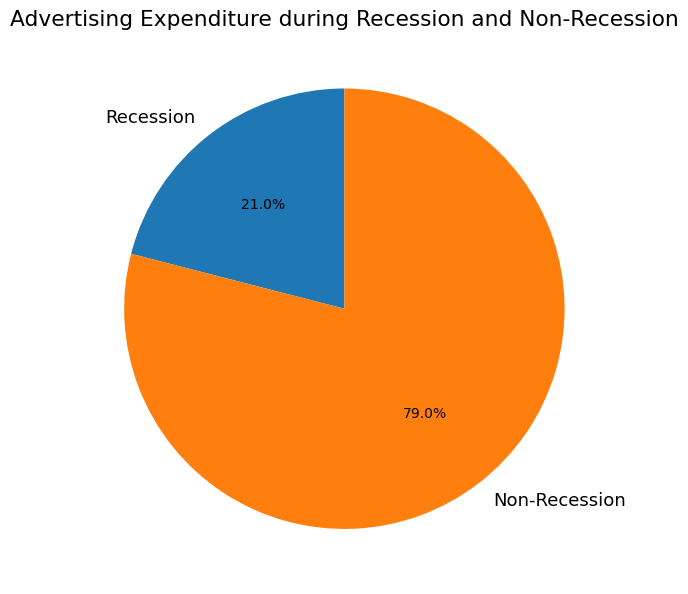

In [154]:
ad_recession = df_recession.Advertising_Expenditure.sum()
ad_non_recession = df_non_recession.Advertising_Expenditure.sum()
labels = ["Recession", "Non-Recession"]
sizes = [ad_recession,ad_non_recession]
plt.pie(sizes,labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Advertising Expenditure during Recession and Non-Recession")
plt.show()

### Inference
More expenditure for advertisement during non recession. 

## How much was advertisement expenditure per vehicle type during recession

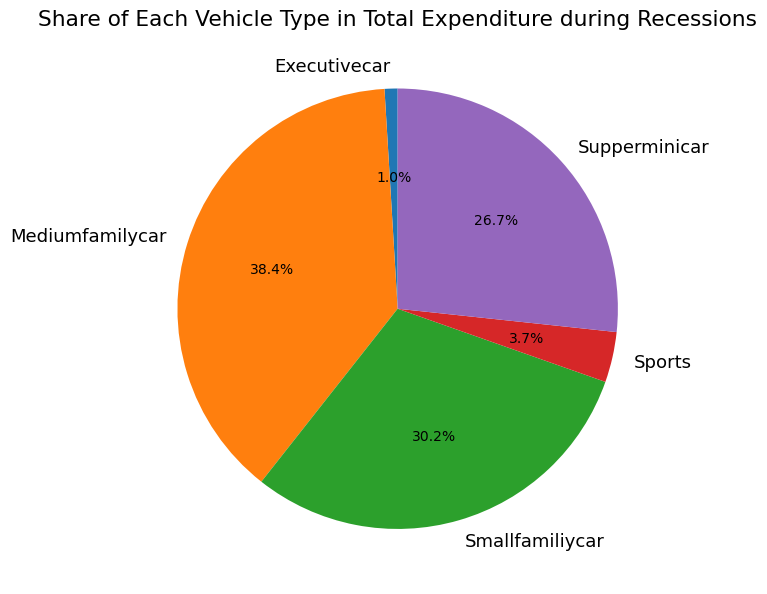

In [164]:
df_rec_veh_add = df_recession.groupby(df_recession.Vehicle_Type)["Advertising_Expenditure"].sum()
plt.pie(df_rec_veh_add.values,labels=df_rec_veh_add.index, autopct="%1.1f%%", startangle=90)
plt.title("Share of Each Vehicle Type in Total Expenditure during Recessions")
plt.show()

## How does unemployment rate relate to automobile sales and vehicle type during recession

In [165]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

/var/folders/hc/75f2v8756lz376jb6_px2_ym0000gn/T/ipykernel_702/4091035472.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


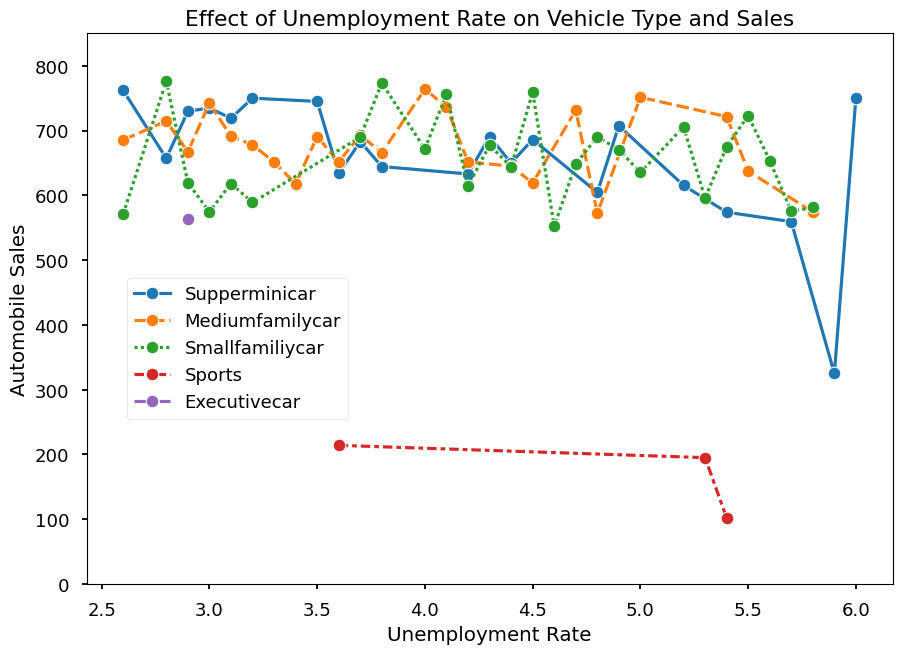

In [181]:
sns.lineplot(
    data=df_recession,
    x="unemployment_rate",
    y="Automobile_Sales", 
    style="Vehicle_Type",
    hue = "Vehicle_Type",
    markers="o",
    err_style=None
)
plt.ylim(0,850)
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Automobile Sales")
plt.legend(title="Vehicle Type")
plt.legend(loc=(0.05,.3))
plt.show()

## Map of hightest sales region/offices of the company during recession period

#### Download and save US states geojson

In [189]:

import requests
import json
us_states_geo= requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json").json()
with open("us-states.json", "w") as file:
    file.write(json.dumps( us_states_geo))

In [197]:
sales_by_city = df_recession.groupby('City')['Automobile_Sales'].sum().reset_index()
sales_by_city["City"]=sales_by_city["City"].apply(lambda x: x.strip())

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color="White",
    highlight=True,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1